In [8]:

# Pandas serve para trabalhar com a base de dados
import pandas as pd

# NumPy é utilizada para gerar as matrizes
import numpy as np

# As seaborn e pyplot serão usadas para gerar gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# StandardScaler para normalizar os dados
from sklearn.preprocessing import StandardScaler

# train_test_split é utilizada para fazer a divisão entre os dados para treinamento e teste
from sklearn.model_selection import train_test_split

# f1_score e ConfusionMatrix.classifier geram métricas para a avaliação dos modelos
from sklearn.metrics import f1_score
from yellowbrick.classifier import ConfusionMatrix

# Import da base de dados
base_akc = pd.read_csv('C:/Users/Ana Clara Santos/Downloads/akc-data.csv')

# Definindo seed
SEED = 42 # get that reference!

In [9]:
# Exibindo base de dados original
pd.DataFrame(base_akc)

,Unnamed: 0,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,...,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
0,Affenpinscher,The Affen’s apish look has been described many...,"Confident, Famously Funny, Fearless",148,22.86,29.21,3.175147,4.535924,12.0,15.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.6,Regular Exercise,0.8,Easy Training,1.0,Outgoing
1,Afghan Hound,"The Afghan Hound is an ancient breed, his whol...","Dignified, Profoundly Loyal, Aristocratic",113,63.50,68.58,22.679619,27.215542,12.0,15.0,...,0.8,Daily Brushing,0.2,Infrequent,0.8,Energetic,0.2,May be Stubborn,0.2,Aloof/Wary
2,Airedale Terrier,The Airedale Terrier is the largest of all ter...,"Friendly, Clever, Courageous",60,58.42,58.42,22.679619,31.751466,11.0,14.0,...,0.6,2-3 Times a Week Brushing,0.4,Occasional,0.6,Regular Exercise,1.0,Eager to Please,0.8,Friendly
3,Akita,"Akitas are burly, heavy-boned spitz-type dogs ...","Courageous, Dignified, Profoundly Loyal",47,60.96,71.12,31.751466,58.967008,10.0,13.0,...,0.8,Daily Brushing,0.6,Seasonal,0.8,Energetic,1.0,Eager to Please,0.6,Alert/Responsive
4,Alaskan Malamute,The Alaskan Malamute stands 23 to 25 inches at...,"Affectionate, Loyal, Playful",58,58.42,63.50,34.019428,38.555351,10.0,14.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.8,Friendly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Wirehaired Vizsla,WVs are close relatives of Vizslas but a disti...,"Gentle, Loyal, Trainable",167,54.61,63.50,20.411657,29.483504,12.0,14.0,...,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
273,Working Kelpie,The overall appearance of the Working Kelpie i...,"Alert, Eager, Intelligent",NaN,48.26,63.50,12.700586,27.215542,12.0,15.0,...,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.6,Alert/Responsive
274,Xoloitzcuintli,The Xoloitzcuintli (show-low-eats-queen-tlee) ...,"Loyal, Alert, Calm",140,25.40,58.42,4.535924,24.947580,13.0,18.0,...,0.2,Occasional Bath/Brush,0.2,Infrequent,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
275,Yakutian Laika,For centuries the Yakutian Laika was an irrepl...,"Affectionate, Intelligent, Active",NaN,53.34,58.42,18.143695,24.947580,10.0,12.0,...,0.4,Weekly Brushing,0.6,Seasonal,0.8,Energetic,0.2,May be Stubborn,0.4,Reserved with Strangers


In [10]:
#Limpeza de dados
# Os atributos Unnamed: 0, description e temperament foram removidos porque eram textuais. Utiliza-los tornaria o processamento e a execução desnecessariamente mais custosos
base_akc = base_akc.drop('Unnamed: 0', axis = 1)
base_akc = base_akc.drop('description', axis = 1)
base_akc = base_akc.drop('temperament', axis = 1)

# Como mais de 25%(exatamente 28,519855596%) dos valores estão vazios, decidiu-se por cortar o atributo popularity
base_akc = base_akc.drop('popularity', axis = 1)

# Os atributos abaixo foram removidos pois foram indetificados como atributos categóricos derivados da classificação de atributos numéricos, portando são dados redundantes 
# Ex: grooming_frequency_value -> grooming_frequency_category
base_akc = base_akc.drop('grooming_frequency_category', axis = 1)
base_akc = base_akc.drop('shedding_category', axis = 1)
base_akc = base_akc.drop('energy_level_category', axis = 1)
base_akc = base_akc.drop('trainability_category', axis = 1)
base_akc = base_akc.drop('demeanor_category', axis = 1)


Lidando com Dados Incompletos
Definiu-se o limite superior em que os atributos serão preechidos manualmente como sendo 10 valores incompletos.

Dados que serão preenchidos manualmente utilizarão informações de www.akc.org para tal.

Para atributos com valores faltosos superior a 10 será utilizada a média da população


In [11]:

# Verificação de valores nulos
base_akc.isnull().sum()

min_height                   0
max_height                   0
min_weight                   2
max_weight                   2
min_expectancy               3
max_expectancy               3
group                        0
grooming_frequency_value     7
shedding_value              20
energy_level_value           6
trainability_value          24
demeanor_value              25
dtype: int64

In [12]:
# Verificação de valores 0s
valores_zero = base_akc == 0.0
valores_zero.sum()

min_height                  0
max_height                  0
min_weight                  1
max_weight                  1
min_expectancy              1
max_expectancy              1
group                       0
grooming_frequency_value    0
shedding_value              0
energy_level_value          0
trainability_value          0
demeanor_value              0
dtype: int64

In [13]:
# Exibindo as linhas em que ambos os valores de 'min_weight' e 'max_weight' são nulos
base_akc[base_akc[['min_weight','max_weight']].isnull().all(axis= 1)]

,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
16,43.18,50.80,NaN,NaN,10.0,13.0,Foundation Stock Service,0.4,0.8,0.8,1.0,0.6
244,55.88,68.58,NaN,NaN,10.0,12.0,Sporting Group,0.4,NaN,0.8,0.6,0.6


In [14]:
# Exibindo as linhas em que ambos os valores de 'min_weight' e 'max_weight' são zero
base_akc[(base_akc['min_weight'] == 0.0) & (base_akc['max_weight'] == 0.0)]

,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
65,59.69,69.85,0.0,0.0,9.0,12.0,Working Group,0.2,0.4,0.8,0.6,0.6


In [15]:
# Preenchendo valores nulos
# obs1: Foi necessário fazer conversão de Libra(site) para Quilograma(database)
# obs2: Dados sobre peso de Spinone Italiano ausentes no site, foi utilizada outra fonte(www.borrowmydoggy.com/doggypedia/dog-breed-guides-italian-spinone)
# obs3: Dados sobre peso de Cane Corso ausentes no site, foi utilizada outra fonte(pt.wikipedia.org/wiki/Cane_corso)
base_akc.at[16, 'min_weight'] = 15.8757
base_akc.at[16, 'max_weight'] = 22.6796
base_akc.at[244, 'min_weight'] = 29.0
base_akc.at[244, 'max_weight'] = 39.0
base_akc.at[65, 'min_weight'] = 40.0
base_akc.at[65, 'max_weight'] = 50.0

In [16]:
# Exibindo as linhas em que ambos os valores de 'min_expectancy' e 'max_expectancy' são nulos
base_akc[base_akc[['min_expectancy','max_expectancy']].isnull().all(axis= 1)]

,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
55,46.990,58.42,18.143695,24.947580,NaN,NaN,Foundation Stock Service,0.2,0.6,1.0,NaN,NaN
67,45.085,49.53,13.607771,24.947580,NaN,NaN,Foundation Stock Service,0.2,0.6,0.6,1.0,0.6
71,64.770,69.85,39.916129,49.895161,NaN,NaN,Foundation Stock Service,0.2,0.6,0.4,0.4,0.2


In [17]:

# Exibindo as linhas em que ambos os valores de 'min_expectancy' e 'max_expectancy' são zero
base_akc[(base_akc['min_expectancy'] == 0.0) & (base_akc['max_expectancy'] == 0.0)]

,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
209,38.1,53.34,6.803886,13.607771,0.0,0.0,Herding Group,0.4,0.6,0.8,0.6,0.4


In [18]:

# Preenchendo valores nulos
# obs: Dados sobre expectativa de vida do Central Asian Shepherd Dog ausentes no site, foi utilizada outra fonte(en.wikipedia.org/wiki/Central_Asian_Shepherd_Dog)
base_akc.at[55, 'min_expectancy'] = 12.0
base_akc.at[55, 'max_expectancy'] = 15.0
base_akc.at[67, 'min_expectancy'] = 12.0
base_akc.at[67, 'max_expectancy'] = 15.0
base_akc.at[71, 'min_expectancy'] = 12.0
base_akc.at[71, 'max_expectancy'] = 15.0
base_akc.at[209, 'min_expectancy'] = 17.0
base_akc.at[209, 'max_expectancy'] = 19.0

In [19]:
# Exibindo as linhas em que valores de 'grooming_frequency_value' são nulos
base_akc[base_akc['grooming_frequency_value'].isnull()]

,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
9,30.48,40.64,5.443108,7.257478,14.0,16.0,Terrier Group,NaN,NaN,NaN,NaN,NaN
68,55.88,60.96,22.679619,43.091275,10.0,14.0,Foundation Stock Service,NaN,NaN,1.0,0.4,0.4
111,54.61,60.96,22.679619,27.215542,10.0,12.0,Foundation Stock Service,NaN,NaN,NaN,NaN,NaN
141,33.02,40.64,7.711070,9.979032,10.0,12.0,Foundation Stock Service,NaN,NaN,NaN,NaN,NaN
195,25.40,38.10,4.535924,6.803886,10.0,18.0,Non-Sporting Group,NaN,NaN,NaN,NaN,NaN
242,71.12,88.90,63.502932,90.718474,10.0,12.0,Foundation Stock Service,NaN,0.6,0.4,NaN,NaN
257,58.42,71.12,28.122727,49.895161,12.0,14.0,Foundation Stock Service,NaN,NaN,NaN,0.8,0.6


In [20]:
# Preenchendo valores nulos
base_akc.at[9, 'grooming_frequency_value'] = 0.2
base_akc.at[68, 'grooming_frequency_value'] = 0.4 
base_akc.at[111, 'grooming_frequency_value'] = 0.2
base_akc.at[141, 'grooming_frequency_value'] = 0.2
base_akc.at[195, 'grooming_frequency_value'] = 0.8
base_akc.at[242, 'grooming_frequency_value'] = 0.2
base_akc.at[257, 'grooming_frequency_value'] = 0.4

In [21]:
# Exibindo as linhas em que valores de 'energy_level_value' são nulos
base_akc[base_akc['energy_level_value'].isnull()]

,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
9,30.48,40.64,5.443108,7.257478,14.0,16.0,Terrier Group,0.2,NaN,NaN,NaN,NaN
111,54.61,60.96,22.679619,27.215542,10.0,12.0,Foundation Stock Service,0.2,NaN,NaN,NaN,NaN
141,33.02,40.64,7.711070,9.979032,10.0,12.0,Foundation Stock Service,0.2,NaN,NaN,NaN,NaN
195,25.40,38.10,4.535924,6.803886,10.0,18.0,Non-Sporting Group,0.8,NaN,NaN,NaN,NaN
227,48.26,58.42,18.143695,27.215542,11.0,13.0,Foundation Stock Service,0.4,0.6,NaN,1.0,NaN
257,58.42,71.12,28.122727,49.895161,12.0,14.0,Foundation Stock Service,0.4,NaN,NaN,0.8,0.6


In [22]:
# Preenchendo valores nulos
base_akc.at[9, 'energy_level_value'] = 0.6
base_akc.at[111, 'energy_level_value'] = 0.8
base_akc.at[141, 'energy_level_value'] = 0.6
base_akc.at[195, 'energy_level_value'] = 0.8
base_akc.at[227, 'energy_level_value'] = 0.6
base_akc.at[257, 'energy_level_value'] = 0.6

In [23]:
# Calcular as médias
shedding_mean = base_akc['shedding_value'].mean()
trainability_mean = base_akc['trainability_value'].mean()
demeanor_mean = base_akc['demeanor_value'].mean()

# Preencher os valores nulos com as médias calculadas em todo o DataFrame
base_akc.fillna({'shedding_value': shedding_mean, 'trainability_value': trainability_mean, 'demeanor_value': demeanor_mean}, inplace=True)


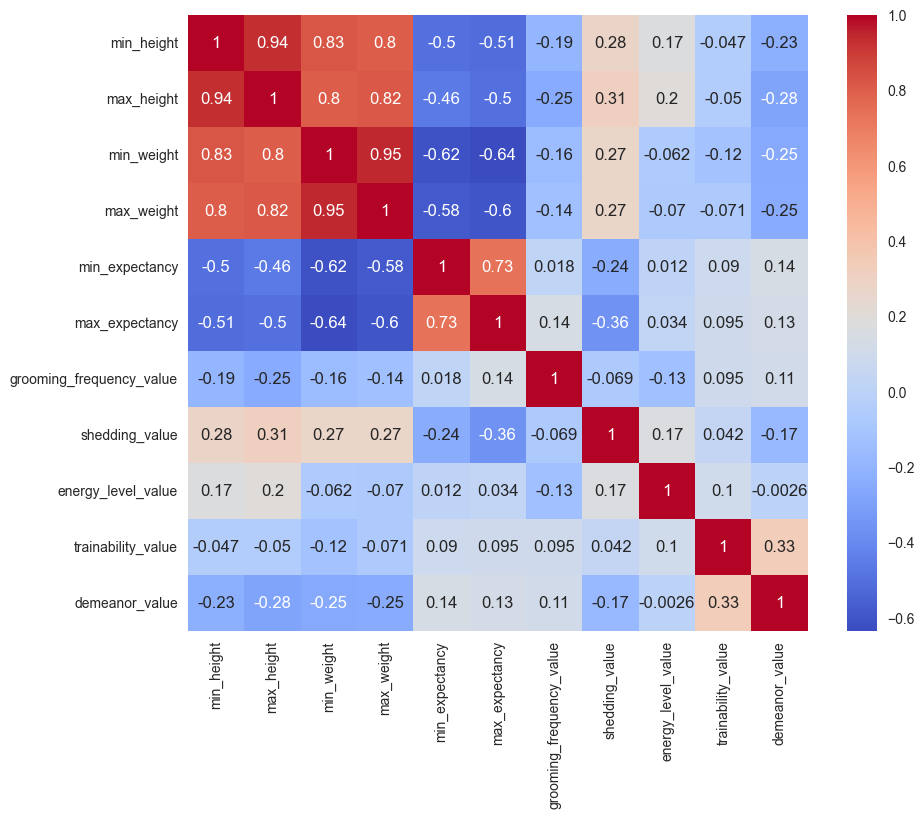

In [24]:

# Verificando a correlação entre os atributos
correlation_matrix = base_akc.drop('group', axis= 1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

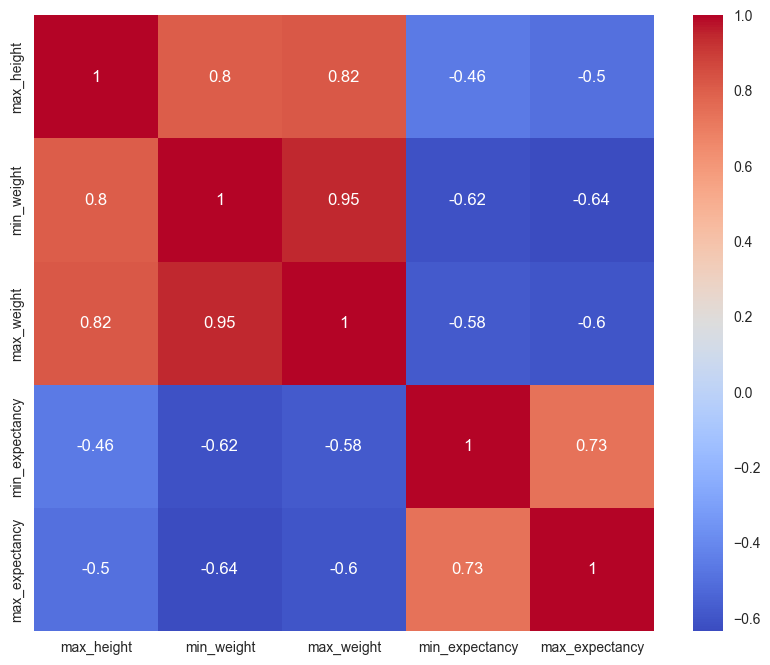

In [25]:
# Zoom in nos atributos que apresentam maior correlação
correlation_matrix = (base_akc.iloc[:, 1:6]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [26]:

# Cópia dos atributos antes da agregação para usar no PCA
preagr_base_ack = base_akc.copy()

In [27]:
# Agregação manual dos atributos min_height & max_height, min_weight & max_weight e min_expectancy & max_expectancy devida à alta correlação, superior a 90% entre eles (veja no heat map acima)
# Obs: Essa alta correlação se deve ao fato desse atributos serem mínimos e máximos de uma mesma característica da população
base_akc.iloc[:, 0] = (base_akc.iloc[:, 0] + base_akc.iloc[:, 1]) / 2
base_akc.iloc[:, 2] = (base_akc.iloc[:, 2] + base_akc.iloc[:, 3]) / 2

# Drop de colunas que não seram mais usadas
base_akc = base_akc.drop(['max_height', 'max_weight'], axis = 1)

# Corrigindo o label das colunas
base_akc.rename(columns={'min_height': 'medium_height'}, inplace=True)
base_akc.rename(columns={'min_weight': 'medium_weight'}, inplace=True)

# Ajustando a precisão dos atributos medium_height e medium_weight para duas casas decimais, com o objetivo de tornar a base de dados mais concisa e legível.
base_akc[['medium_height', 'medium_weight']] = base_akc[['medium_height', 'medium_weight']].astype(float).apply(lambda x: round(x, 2))


In [28]:
# Atributos
features = base_akc.drop('group', axis= 1).values

# Rótulos
target = base_akc.iloc[:, 4]

In [29]:
# Lib necessárias para o PCA
from sklearn.decomposition import PCA

In [30]:
# Normalizando os dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(preagr_base_ack.drop('group', axis= 1))

In [31]:
# Especificando o número de componentes desejados
n_components = 6 
# obs: Foram testados diversos valores que geravam redução de dimensionalidade, o valor 6 foi o que apresentou os melhores resultados comsiderando o quanto ele reduz a base

# Inicializando e ajustando o modelo PCA aos dados normalizados
pca = PCA(n_components = n_components)
pca.fit(features_scaled)

# Transformando os dados para o espaço de componentes principais
features_pca = pca.transform(features_scaled)

In [32]:
# Dividi os dados em conjuntos de treinamento e teste usando a base com agregação manual
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = SEED, stratify = target )

# Dividi os dados em conjuntos de treinamento e teste usando a base com PCA
features_train_pca, features_test_pca, target_train_pca, target_test_pca = train_test_split(features_pca, target, test_size = 0.2, random_state = SEED, stratify = target)

In [33]:
# Import do modelo de Árvore de Decisão que será utilizado
from sklearn.ensemble import RandomForestClassifier

In [34]:
# Inicializa o classificador Random Forest para base com agregação manual
random_forest = RandomForestClassifier(n_estimators=100, random_state=SEED)

# Inicializa o classificador Random Forest para base com PCA
random_forest_pca = RandomForestClassifier(n_estimators=100, random_state=SEED)

# Treina os classificadores
random_forest.fit(features_train, target_train)

random_forest_pca.fit(features_train_pca, target_train_pca)

# Faz previsões no conjunto de teste
target_pred = random_forest.predict(features_test)

target_pred_pca = random_forest_pca.predict(features_test_pca)

---Agregação Manual---

F1-score (Micro Average): 0.42857142857142855 

F1-score (Macro Average): 0.37679357679357683 

F1-score (Weighted Average): 0.43384948384948385


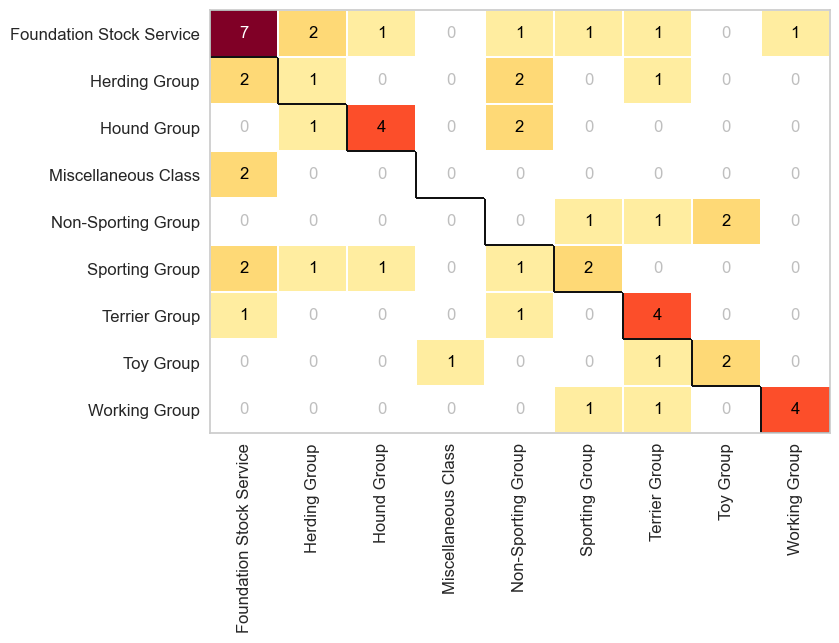

In [35]:
# Avaliação da precisão do modelo treinado com a base de agregação manual utilizando F1-score

print('---Agregação Manual---\n')

# Calcula o F1-score globalmente contando o total de verdadeiros positivos, falsos positivos e falsos negativos.
# Este método trata todas as predições como se fossem de uma única classe grande.
print("F1-score (Micro Average):", f1_score(target_test, target_pred, average= 'micro'), '\n')

# Calcula a média do F1-score de cada classe, sem considerar a proporção de cada classe.
# Trata todas as classes igualmente.
print("F1-score (Macro Average):", f1_score(target_test, target_pred, average= 'macro'), '\n')

# Calcula a média do F1-score de cada classe, ponderando pela quantidade de verdadeiros exemplos de cada classe.
# Dá mais importância às classes com mais exemplos.
print("F1-score (Weighted Average):", f1_score(target_test, target_pred, average= 'weighted'))

# Para melhor visualização, podemos gerar a matriz de confusão do modelo
cm = ConfusionMatrix(random_forest)
cm.fit(features_train, target_train)
cm.score(features_test, target_test);

---PCA---

F1-score (Micro Average): 0.39285714285714285 

F1-score (Macro Average): 0.34528689152345066 

F1-score (Weighted Average): 0.3856561896884477


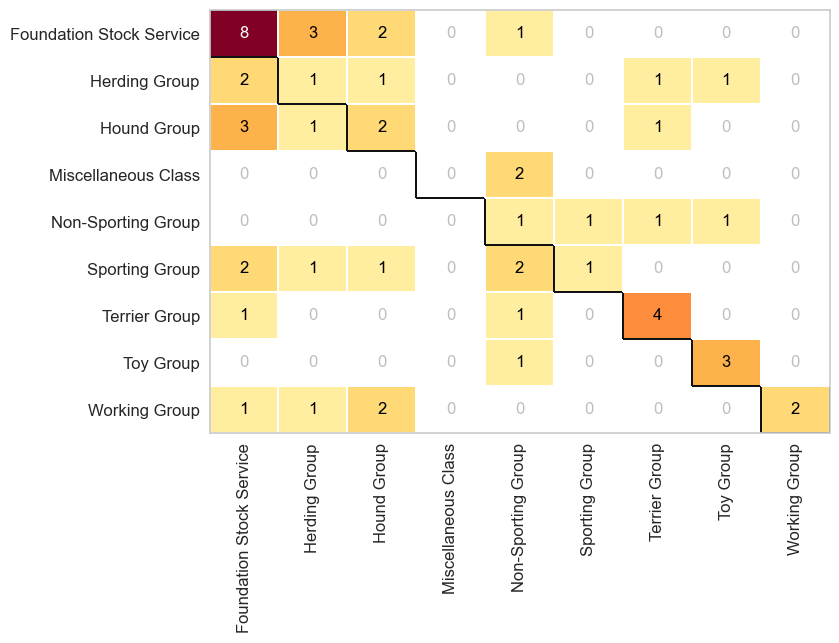

In [36]:
# Avaliação da precisão do modelo treinado com a base de agregação manual utilizando F1-score

print('---PCA---\n')

# Calcula o F1-score globalmente contando o total de verdadeiros positivos, falsos positivos e falsos negativos.
# Este método trata todas as predições como se fossem de uma única classe grande.
print("F1-score (Micro Average):", f1_score(target_test_pca, target_pred_pca, average= 'micro'), '\n')

# Calcula a média do F1-score de cada classe, sem considerar a proporção de cada classe.
# Trata todas as classes igualmente.
print("F1-score (Macro Average):", f1_score(target_test_pca, target_pred_pca, average= 'macro'), '\n')

# Calcula a média do F1-score de cada classe, ponderando pela quantidade de verdadeiros exemplos de cada classe.
# Dá mais importância às classes com mais exemplos.
print("F1-score (Weighted Average):", f1_score(target_test_pca, target_pred_pca, average= 'weighted'))

# Para melhor visualização, podemos gerar a matriz de confusão do modelo
cm_pca = ConfusionMatrix(random_forest_pca)
cm_pca.fit(features_train_pca, target_train_pca)
cm_pca.score(features_test_pca, target_test_pca);

Conclusões
Desempenho Geral:
O F1-score médio ponderado é uma métrica útil para avaliar o desempenho geral do modelo. No caso do conjunto de dados com agrupamento manual, o F1-score médio ponderado é de aproximadamente 0.43, enquanto no conjunto de dados com PCA é de cerca de 0.39. Isso sugere que o modelo treinado com a base de dados com agrupamento manual teve um desempenho ligeiramente melhor em comparação com o modelo treinado com a base de dados com PCA.

Equilíbrio de Classes:
A matriz de confusão também fornece insights sobre como o modelo está se saindo na classificação de cada classe. Observando as células fora da diagonal principal (que indicam classificações incorretas), podemos ver como o modelo está distribuindo incorretamente as previsões entre as diferentes classes. Percebe-se também que o modelo é tendencioso, pois sempre tenta classificar os objetos como pertencentes as classes com maior população. Isso ocorre pois a base de dados original estava desbalanceada e utilizou-se amostragem estratificada para divisão dos conjuntos de treinameno e teste.

Impacto do Pré-processamento:
O uso de PCA para redução de dimensionalidade pode ter impactado negativamente o desempenho do modelo. Embora o PCA reduza a dimensionalidade do conjunto de dados, ele também pode eliminar informações importantes, o que pode resultar em uma perda de desempenho do modelo.

Desbalanceamento e Tamanho do Conjunto de Dados Original:
O fato de o conjunto de dados original ser pequeno e desbalanceado influenciou significativamente o desempenho do modelo. Modelos de aprendizado de máquina tendem a ter dificuldades em lidar com conjuntos de dados pequenos e desbalanceados, o que pode resultar em desempenho inferior e viés em direção às classes majoritárias.

In [37]:
#NAIVE BAYES
# Import do Naive Bayes Gaussiano, o modelo Gaussiano é preferido pois a base de dados é numérica e não textual
from sklearn.naive_bayes import GaussianNB

In [38]:
# Inicializando o modelo
gnb = GaussianNB()
gnb_pca = GaussianNB()


# Treinando os modelos no conjunto de treinamento
gnb.fit(features_train, target_train)
gnb_pca.fit(features_train_pca, target_train_pca)
   
# Fazendo previsões no conjunto de teste
target_pred = gnb.predict(features_test)
target_pred_pca = gnb_pca.predict(features_test_pca)

---Agregação Manual---

F1-score (Micro Average): 0.30357142857142855 

F1-score (Macro Average): 0.26017642488230724 

F1-score (Weighted Average): 0.281060116354234


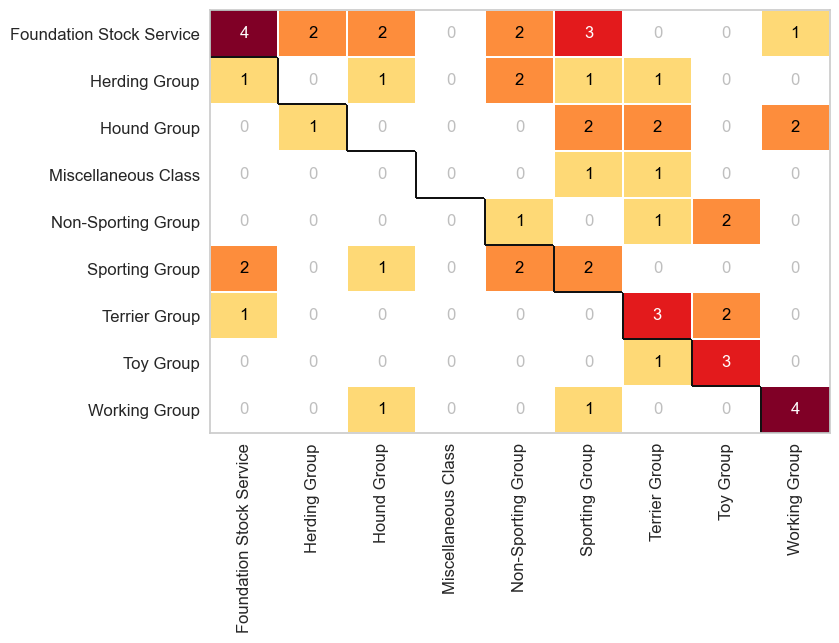

In [39]:
# Avaliação da precisão do modelo treinado com a base de agregação manual utilizando F1-score

print('---Agregação Manual---\n')

# Calcula o F1-score globalmente contando o total de verdadeiros positivos, falsos positivos e falsos negativos.
# Este método trata todas as predições como se fossem de uma única classe grande.
print("F1-score (Micro Average):", f1_score(target_test, target_pred, average= 'micro'), '\n')

# Calcula a média do F1-score de cada classe, sem considerar a proporção de cada classe.
# Trata todas as classes igualmente.
print("F1-score (Macro Average):", f1_score(target_test, target_pred, average= 'macro'), '\n')

# Calcula a média do F1-score de cada classe, ponderando pela quantidade de verdadeiros exemplos de cada classe.
# Dá mais importância às classes com mais exemplos.
print("F1-score (Weighted Average):", f1_score(target_test, target_pred, average= 'weighted'))

# Para melhor visualização, podemos gerar a matriz de confusão do modelo
cm = ConfusionMatrix(gnb)
cm.fit(features_train, target_train)
cm.score(features_test, target_test);

---PCA---

F1-score (Micro Average): 0.3392857142857143 

F1-score (Macro Average): 0.3073029320341148 

F1-score (Weighted Average): 0.3260430174024644


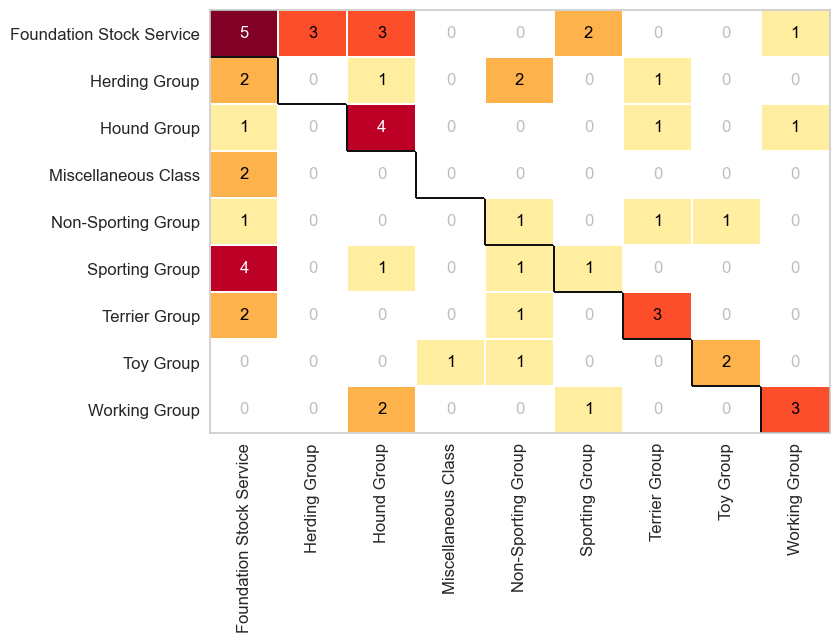

In [40]:
# Avaliação da precisão do modelo treinado com a base de agregação manual utilizando F1-score

print('---PCA---\n')

# Calcula o F1-score globalmente contando o total de verdadeiros positivos, falsos positivos e falsos negativos.
# Este método trata todas as predições como se fossem de uma única classe grande.
print("F1-score (Micro Average):", f1_score(target_test_pca, target_pred_pca, average= 'micro'), '\n')

# Calcula a média do F1-score de cada classe, sem considerar a proporção de cada classe.
# Trata todas as classes igualmente.
print("F1-score (Macro Average):", f1_score(target_test_pca, target_pred_pca, average= 'macro'), '\n')

# Calcula a média do F1-score de cada classe, ponderando pela quantidade de verdadeiros exemplos de cada classe.
# Dá mais importância às classes com mais exemplos.
print("F1-score (Weighted Average):", f1_score(target_test_pca, target_pred_pca, average= 'weighted'))

# Para melhor visualização, podemos gerar a matriz de confusão do modelo
cm_pca = ConfusionMatrix(gnb_pca)
cm_pca.fit(features_train_pca, target_train_pca)
cm_pca.score(features_test_pca, target_test_pca);

Conclusões
Desempenho Geral:
Novamente, observamos que o F1-score médio ponderado é uma métrica útil para avaliar o desempenho geral do modelo. No caso do conjunto de dados com agrupamento manual, o F1-score médio ponderado é de aproximadamente 0.28, enquanto no conjunto de dados com PCA é de cerca de 0.33. Neste caso, o modelo treinado com o conjunto de dados com PCA teve um desempenho ligeiramente melhor.

Possíveis Razões para o Desempenho:
É interessante notar que, ao contrário do modelo de Random Forest, o modelo de Naive Bayes obteve um desempenho ligeiramente melhor com o conjunto de dados com PCA. Isso pode ser devido à natureza simplificada e independente das características assumida pelo Naive Bayes, que pode ser mais compatível com as características extraídas após a redução de dimensionalidade pelo PCA. O PCA pode ter capturado melhor a estrutura subjacente dos dados para o Naive Bayes, tornando-o mais eficaz em comparação com o conjunto de dados original com agrupamento manual.

Efeito do Random State:
O random_state é um parâmetro que afeta a aleatoriedade no treinamento do modelo. Se o desempenho do modelo variar significativamente com diferentes valores de random_state, isso pode indicar que o modelo é sensível à inicialização aleatória e que os resultados podem não ser totalmente confiáveis. Para garantir a estabilidade dos resultados, é uma prática comum realizar múltiplas execuções do modelo com diferentes valores de random_state e, em seguida, relatar estatísticas resumidas sobre o desempenho. Portanto o resultado obtido pode ser anormal e se tratar de uma peculiaridade do random_state = 42 especificamente.

In [41]:
#MPL
# Import do classificador Perceptron Multicamadas
from sklearn.neural_network import MLPClassifier

In [42]:
# Inicializando o modelo
mlp = MLPClassifier(hidden_layer_sizes= (128, 64, 32, 16), max_iter= 10000, random_state= SEED)
mlp_pca = MLPClassifier(hidden_layer_sizes= (128, 64, 32, 16), max_iter= 10000, random_state= SEED)

# # Treinando os modelos no conjunto de treinamento
mlp.fit(features_train, target_train)
mlp_pca.fit(features_train_pca, target_train_pca)

# Fazendo previsões no conjunto de teste
target_pred = mlp.predict(features_test)
target_pred_pca = mlp_pca.predict(features_test_pca)

---Agregação Manual---

F1-score (Micro Average): 0.4642857142857143 

F1-score (Macro Average): 0.3523066926575698 

F1-score (Weighted Average): 0.3891186299081036


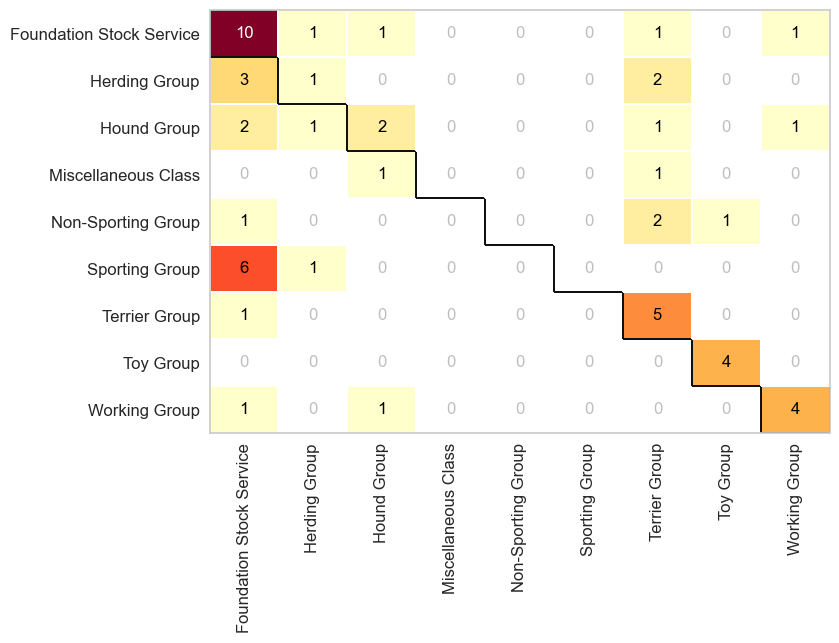

In [43]:
# Avaliação da precisão do modelo treinado com a base de agregação manual utilizando F1-score

print('---Agregação Manual---\n')

# Calcula o F1-score globalmente contando o total de verdadeiros positivos, falsos positivos e falsos negativos.
# Este método trata todas as predições como se fossem de uma única classe grande.
print("F1-score (Micro Average):", f1_score(target_test, target_pred, average= 'micro'), '\n')

# Calcula a média do F1-score de cada classe, sem considerar a proporção de cada classe.
# Trata todas as classes igualmente.
print("F1-score (Macro Average):", f1_score(target_test, target_pred, average= 'macro'), '\n')

# Calcula a média do F1-score de cada classe, ponderando pela quantidade de verdadeiros exemplos de cada classe.
# Dá mais importância às classes com mais exemplos.
print("F1-score (Weighted Average):", f1_score(target_test, target_pred, average= 'weighted'))

# Para melhor visualização, podemos gerar a matriz de confusão do modelo
cm = ConfusionMatrix(mlp)
cm.fit(features_train, target_train)
cm.score(features_test, target_test);

---PCA---

F1-score (Micro Average): 0.30357142857142855 

F1-score (Macro Average): 0.2593554593554593 

F1-score (Weighted Average): 0.29141929499072355


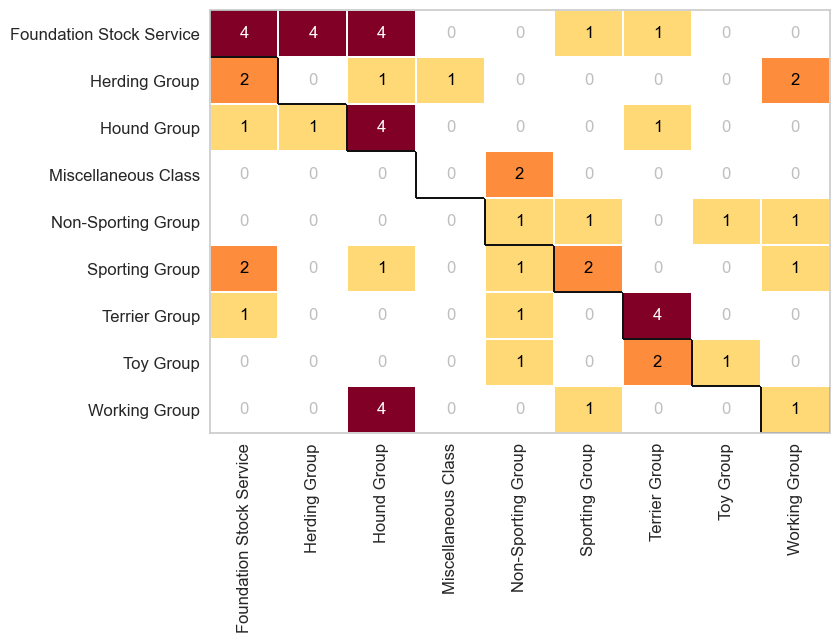

In [44]:
# Avaliação da precisão do modelo treinado com a base de agregação manual utilizando F1-score

print('---PCA---\n')

# Calcula o F1-score globalmente contando o total de verdadeiros positivos, falsos positivos e falsos negativos.
# Este método trata todas as predições como se fossem de uma única classe grande.
print("F1-score (Micro Average):", f1_score(target_test_pca, target_pred_pca, average= 'micro'), '\n')

# Calcula a média do F1-score de cada classe, sem considerar a proporção de cada classe.
# Trata todas as classes igualmente.
print("F1-score (Macro Average):", f1_score(target_test_pca, target_pred_pca, average= 'macro'), '\n')

# Calcula a média do F1-score de cada classe, ponderando pela quantidade de verdadeiros exemplos de cada classe.
# Dá mais importância às classes com mais exemplos.
print("F1-score (Weighted Average):", f1_score(target_test_pca, target_pred_pca, average= 'weighted'))

# Para melhor visualização, podemos gerar a matriz de confusão do modelo
cm_pca = ConfusionMatrix(mlp_pca)
cm_pca.fit(features_train_pca, target_train_pca)
cm_pca.score(features_test_pca, target_test_pca);

Conclusões
Desempenho Geral:
Novamente, observamos o F1-score médio ponderado. No caso do conjunto de dados com agrupamento manual, o F1-score médio ponderado é de aproximadamente 0.39, enquanto no conjunto de dados com PCA é de cerca de 0.29. O modelo treinado com o conjunto de dados com agrupamento manual teve um desempenho significativamente melhor.

Arquitetura da Rede Neural:
A escolha da arquitetura da rede neural, especificada pelo parâmetro hidden_layer_sizes, pode ter um impacto significativo no desempenho do modelo. No caso, a arquitetura escolhida é relativamente complexa, com quatro camadas ocultas e um número considerável de neurônios em cada camada. Essa complexidade pode ter permitido que o modelo capturasse melhor os padrões nos dados brutos do conjunto de dados com agrupamento manual, levando a um desempenho superior em comparação com o conjunto de dados com PCA.

Algoritmos Não-Supervisionados
KMeans

In [45]:
# Import do modelo
from sklearn.cluster import KMeans

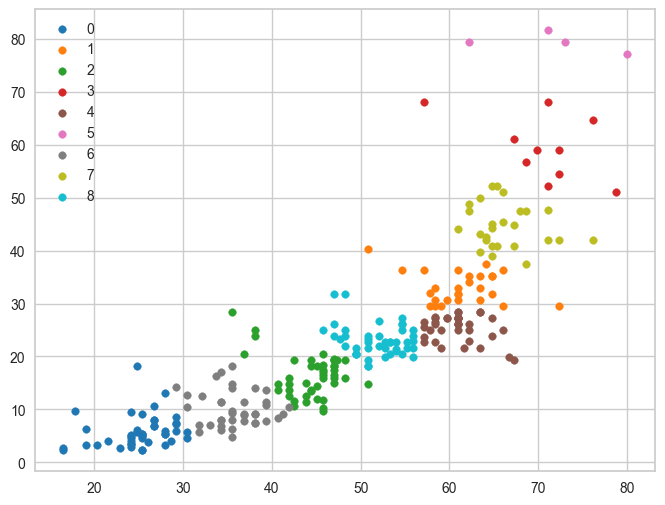

In [46]:
# Criar o modelo K-means com 9 clusters
kmeans = KMeans(n_clusters=9)

# Treinar o modelo e atribuir cada amostra a um cluster
clusters = kmeans.fit_predict(features)

# Encontrar os rótulos únicos dos clusters
u_labels = np.unique(clusters)

# Configurar o tamanho dos símbolos para a dispersão dos pontos
plt.figure(figsize=(8, 6))

# Definir um mapa de cores para os clusters
colors = plt.cm.tab10(np.linspace(0, 1, len(u_labels)))

# Iterar sobre cada cluster único encontrado
for i, color in zip(u_labels, colors):
    # Plotar os pontos pertencentes ao cluster atual com uma cor diferente
    plt.scatter(features[clusters == i, 0], features[clusters == i, 1], label=i, s=30, color=color)

# Adicionar uma legenda ao gráfico
plt.legend()

# Exibir o gráfico
plt.show()